## Defining the Question

### Specifying the Question

The objective of this challenge is to create a machine learning model to predict how much a client will claim from Zimnat per month for a whole year.

### Metrics of Sucess
Create a model that predicts how much a client will claim from Zimnat per month for a whole year with the lowest MAE.

### Understanding the Context

Short-term insurance claims are one of the largest costs in the insurance industry, and are extremely difficult to forecast. Zimnat Insurance wants to predict the value of future claims per client, in order to better forecast annual costs.

### The experimental Design 

1. Loading the Required Libraries.

2. Checking out Data.

3. Data Cleaning.

4. Exploratory Design.

5. Feature Engineering.

6. Modelling. 

7. Conclusions and Recommendations.






## Reading the Datasets

In [21]:
# Loading the the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Loading the datasets
train_df = pd.read_csv(r"C:\Users\Hp\Downloads\train (1).csv")
test_df = pd.read_csv(r"C:\Users\Hp\Downloads\test (1).csv")
data_desc = pd.read_csv(r"C:\Users\Hp\Downloads\DataDictionary.csv")
sample_sub = pd.read_csv(r"C:\Users\Hp\Downloads\SampleSubmission (1).csv")
policies = pd.read_csv(r"C:\Users\Hp\Downloads\policies.csv")

## Checking the Data

In [23]:
# Previewing Train Dataset 
train_df.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64


In [25]:
# Previewing the test dataset
test_df.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch
0,ID_4RO0KZI9BBW2,pol000007115,claim0005757,300000.0,prod00005,ag00068,cob00009,rt00032,2021-03-11,ct0003,rf0001,pc0007,sc00029,br00004
1,ID_GTE9ZUJ9GZ97,pol000006008,claim0003037,2700000.0,prod00015,ag00064,cob00034,rt00023,2020-06-25,ct0001,rf0003,pc0007,sc00022,br00002
2,ID_RUVIYRKWZ4RG,pol000007651,claim0006507,4071352.0,prod00012,ag00021,cob00016,rt00015,2019-03-14,ct0001,rf0001,pc0011,sc00049,br00001
3,ID_J81X8SWU6JYN,pol000010981,claim0013636,0.0,prod00002,ag00037,cob00002,rt00002,2018-12-04,ct0001,rf0002,pc0002,sc00012,br00005
4,ID_94NM3JJAWWOQ,pol000005926,claim0001750,1607178.0,prod00015,ag00037,cob00034,rt00023,2019-09-18,ct0001,rf0003,pc0007,sc00022,br00002


In [26]:
# Previewing the policies dataset
policies.head()

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
0,pol000006995,prod00033,2017-07-01 08:24:55.800,2017-07-01 00:00:00.000,2018-07-01 00:00:00.000,ag00005,cob00035,ct0001,rf0002,br00002
1,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00006
2,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00031,ct0003,rf0001,br00006
3,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00031,ct0003,rf0001,br00002
4,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00009,ct0003,rf0001,br00002


In [27]:
# Previewing the Sample Submissions dataset
sample_sub.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,0
1,ID_GTE9ZUJ9GZ97,0
2,ID_RUVIYRKWZ4RG,0
3,ID_J81X8SWU6JYN,0
4,ID_94NM3JJAWWOQ,0


In [29]:
# Previewing the data dictionary
data_desc

,Policy Data,Unnamed: 1
0,Columns,Data type
1,policy number,Unique policy identifier
2,product code,product code
3,trans date,date of policy transaction
4,from date,first date of policy cover
5,to date,last date of policy cover
6,agency full name,agency
7,class of business,class of business
8,client type,client type
9,Renewal frequency,policy renewal frequency


In [30]:
# Checking the number of records in our datasets
train_df.shape,test_df.shape, sample_sub.shape, policies.shape

((9376, 15), (4019, 14), (4019, 2), (30371, 10))

In [31]:
# Checking whether each column has an appropriate datatype in the train dataset

train_df.dtypes

claim_id              object
policy_number         object
claim_number          object
sum_insured          float64
product               object
agent                 object
class_of_business     object
risk_type             object
loss_date             object
client_type           object
renewal_frequency     object
primary_cause         object
secondary_cause       object
branch                object
target               float64
dtype: object

In [32]:
# Checking whether each column has an appropriate datatype in the test dataset

test_df.dtypes

claim_id              object
policy_number         object
claim_number          object
sum_insured          float64
product               object
agent                 object
class_of_business     object
risk_type             object
loss_date             object
client_type           object
renewal_frequency     object
primary_cause         object
secondary_cause       object
branch                object
dtype: object

## Tidying the Dataset

In [33]:
# Checking for missing data
train_df.isna().sum()/len(df)

claim_id             0.000000
policy_number        0.009172
claim_number         0.000000
sum_insured          0.000000
product              0.000000
agent                0.000000
class_of_business    0.000000
risk_type            0.000000
loss_date            0.000000
client_type          0.000000
renewal_frequency    0.000000
primary_cause        0.000000
secondary_cause      0.000000
branch               0.000000
target               0.000000
dtype: float64

In [34]:
# Checking for missing data
test_df.isna().sum()/len(df)

claim_id             0.000000
policy_number        0.004373
claim_number         0.000000
sum_insured          0.000000
product              0.000000
agent                0.000000
class_of_business    0.000000
risk_type            0.000000
loss_date            0.000000
client_type          0.000000
renewal_frequency    0.000000
primary_cause        0.000000
secondary_cause      0.000000
branch               0.000000
dtype: float64

The train and test datasets have missing values in the policy_number column. These missing values have a ratio of 0.9% in the train dataset and 0.4% in the test dataset of the total records in the dataset. 

Since this column is categorical, we will fill the missing values with most common value.

In [38]:
# Handlin the missing values in the train and test datasets

# Train
train_df['policy_number'] = train_df['policy_number'].fillna(train_df['policy_number'].mode()[0])

# Test

test_df['policy_number'] = test_df['policy_number'].fillna(test_df['policy_number'].mode()[0])

# Confirming if the changes were effective

#train_df.isnull().sum()

test_df.isnull().sum()

claim_id             0
policy_number        0
claim_number         0
sum_insured          0
product              0
agent                0
class_of_business    0
risk_type            0
loss_date            0
client_type          0
renewal_frequency    0
primary_cause        0
secondary_cause      0
branch               0
dtype: int64

In [39]:
# Checking for duplicates
train_df.duplicated().sum(), test_df.duplicated().sum()

(0, 0)

There are no duplicates in both train and test datasets.

In [41]:
#Converting the date columns in the dataset to the appropiate date time data type.

train_df['loss_date'] = pd.to_datetime(train_df['loss_date'])
test_df['loss_date'] = pd.to_datetime(test_df['loss_date'])

# Confirming if the changes were effective
#train_df.dtypes
test_df.dtypes

claim_id                     object
policy_number                object
claim_number                 object
sum_insured                 float64
product                      object
agent                        object
class_of_business            object
risk_type                    object
loss_date            datetime64[ns]
client_type                  object
renewal_frequency            object
primary_cause                object
secondary_cause              object
branch                       object
dtype: object

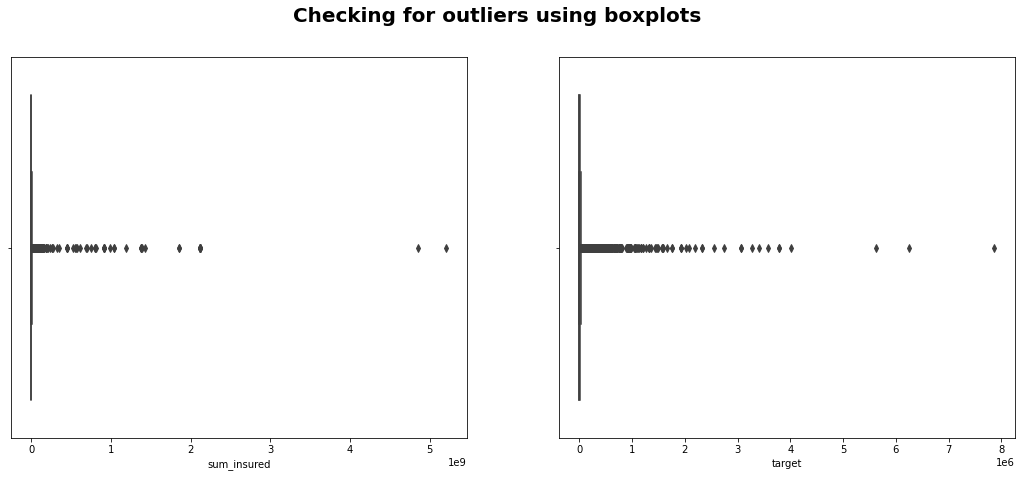

In [43]:
# Checking for outliers in our numerical columns 

col_names = ['sum_insured', 'target']


fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,7))
plt.suptitle('Checking for outliers using boxplots',fontsize=20,weight='bold',color='black')
for ax, data, column in zip(axes.flatten(),train_df,col_names):
  sns.boxplot(train_df[column],ax=ax)

We have outliers in the numerical columns. We will normalize the dataset when doing feature engineering to tackle the outliers.

## Exploratory Analysis

i) Central Tendencies

In [46]:
# Finding Mode 
num_cols = train_df[['sum_insured', 'target']]

num_cols.mode()


,sum_insured,target
0,0.0,0.0


In [47]:
# Finding Median
num_cols.median()

sum_insured    50542.000
target          1956.925
dtype: float64

In [48]:
# Finding mean
num_cols.mean()

sum_insured    8.534790e+06
target         4.146471e+04
dtype: float64

In [49]:
num_cols.describe()

,sum_insured,target
count,9.376000e+03,9.376000e+03
mean,8.534790e+06,4.146471e+04
std,1.125565e+08,2.084347e+05
min,0.000000e+00,0.000000e+00
25%,6.500000e+03,2.879250e+02
50%,5.054200e+04,1.956925e+03
75%,4.200000e+05,1.270064e+04
max,5.211868e+09,7.868591e+06


In [60]:
num_cols.skew()

sum_insured    27.531764
target         17.015541
dtype: float64

In [61]:
num_cols.kurt()

sum_insured    991.394908
target         435.967074
dtype: float64

In [73]:
# Convert categorical variables to categorical objects
cat_cols = train_df.columns.difference(['claim_id', 'loss_date', 'sum_insured', 'target']).astype("category")

# Preview categorical variables
train_df[cat_cols].head()

,agent,branch,claim_number,class_of_business,client_type,policy_number,primary_cause,product,renewal_frequency,risk_type,secondary_cause
0,ag00068,br00006,claim0011359,cob00031,ct0003,pol000009680,pc0007,prod00027,rf0001,rt00006,sc00022
1,ag00226,br00002,claim0005272,cob00010,ct0003,pol000006869,pc0007,prod00005,rf0001,rt00032,sc00023
2,ag00037,br00002,claim0004147,cob00010,ct0003,pol000006135,pc0007,prod00029,rf0001,rt00026,sc00024
3,ag00037,br00001,claim0009962,cob00009,ct0003,pol000008991,pc0007,prod00005,rf0001,rt00032,sc00021
4,ag00226,br00001,claim0007346,cob00034,ct0001,pol000007768,pc0007,prod00015,rf0001,rt00023,sc00021


In [76]:
# Fill in missing values in categorical variables with the most common
#train[cat_cols] = train[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  train_df[col] = train_df[col].astype('category')

# Confirm
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           9376 non-null   object        
 1   policy_number      9376 non-null   category      
 2   claim_number       9376 non-null   category      
 3   sum_insured        9376 non-null   float64       
 4   product            9376 non-null   category      
 5   agent              9376 non-null   category      
 6   class_of_business  9376 non-null   category      
 7   risk_type          9376 non-null   category      
 8   loss_date          9376 non-null   datetime64[ns]
 9   client_type        9376 non-null   category      
 10  renewal_frequency  9376 non-null   category      
 11  primary_cause      9376 non-null   category      
 12  secondary_cause    9376 non-null   category      
 13  branch             9376 non-null   category      
 14  target  

In [74]:
train_df.dtypes

claim_id                     object
policy_number                object
claim_number                 object
sum_insured                 float64
product                      object
agent                        object
class_of_business            object
risk_type                    object
loss_date            datetime64[ns]
client_type                  object
renewal_frequency            object
primary_cause                object
secondary_cause              object
branch                       object
target                      float64
dtype: object

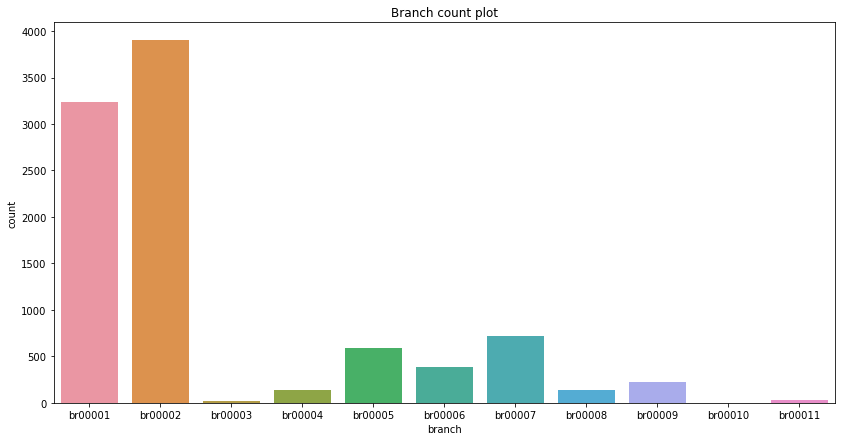

In [77]:
# Checking Claims according to branch
plt.figure(figsize = (14, 7))
sns.countplot(x = 'branch', data = train_df)
plt.title('Branch count plot')
plt.show()

## Feature Engineering


In [84]:
# Label Encoding our categorical variables
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
train_df[cat_cols] = train_df[cat_cols].apply(en.fit_transform)

train_df.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,3070,7439,300000.0,26,4,30,5,2021-05-13,2,0,6,20,5,82150.00
1,ID_KQ5TJMVLJ4EP,1126,3469,16000.0,4,7,9,31,2018-05-13,2,0,6,21,1,3780.24
2,ID_NYHI7WJGGIAE,630,2799,3000.0,28,1,9,25,2018-08-18,2,0,6,22,1,2196.50
3,ID_ROMMDCXYUXN5,2546,6448,6000.0,4,1,8,31,2018-12-20,2,0,6,19,0,105.67
4,ID_2OTD9NX8L73D,1767,4832,26850.0,14,7,32,22,2018-11-07,0,0,6,19,0,1605.64


In [92]:
# Splitting the loss date column to day, month and year
# day
train_df['loss_date_day'] = train_df.loss_date.dt.day

# month
train_df['loss_date_month'] = train_df.loss_date.dt.month
 
# year
train_df['loss_date_year'] = train_df.loss_date.dt.year

train_df.drop('loss_date', axis = 1, inplace=True)

[0.06643753 0.09477879 0.17226897 0.01716445 0.0459621  0.02706404
 0.0296655  0.00505029 0.05182172 0.03151447 0.12334114 0.01210816
 0.12574123 0.11481407 0.08226753]


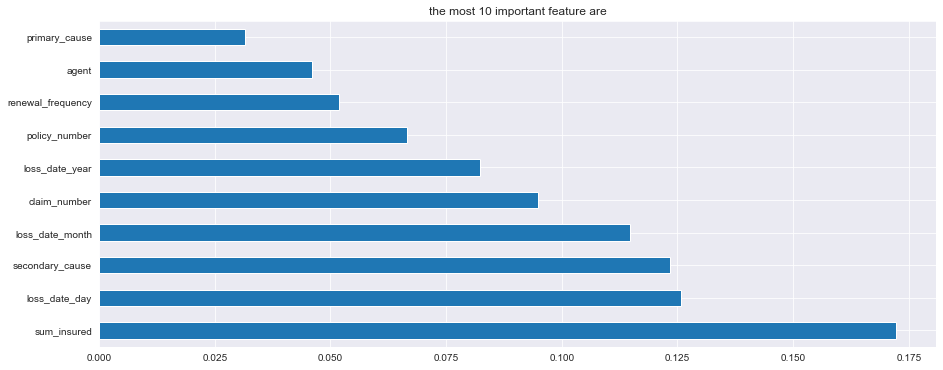

In [94]:
# Feature Selection
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

X = train_df.drop(['target', 'claim_id'], axis=1)
y = train_df['target']

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('the most 10 important feature are')
plt.show()

In [96]:
# Standardization

train_df.columns

Index(['claim_id', 'policy_number', 'claim_number', 'sum_insured', 'product',
       'agent', 'class_of_business', 'risk_type', 'client_type',
       'renewal_frequency', 'primary_cause', 'secondary_cause', 'branch',
       'target', 'loss_date_day', 'loss_date_month', 'loss_date_year'],
      dtype='object')

## Modelling

### Linear Regression

In [109]:
feat_imp = train_df[['sum_insured', 'loss_date_day', 'secondary_cause', 'loss_date_month','claim_number','loss_date_year','policy_number','renewal_frequency','agent', 'primary_cause']]

X = feat_imp
y = train_df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the MAE score of the model
print(f'LinearRegression MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

LinearRegression MAE score on the X_test is: 57943.49329133189


### MLPRegressor

In [100]:
from sklearn.neural_network import MLPRegressor
#Using the classifier along with grid search:
mlp=MLPRegressor(hidden_layer_sizes=(20,20,20),activation='relu',alpha=0.0001,learning_rate='constant',solver='lbfgs',random_state=23)
#Fit model 
mlp.fit(X_train,y_train)
#Prediting with trained model
y_pred = mlp.predict(X_test)

In [101]:
# Evaluating our model

print(f'MLPRegressor MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

MLPRegressor MAE score on the X_test is: 40220.59124072262


# Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
params = {'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(estimator=forest,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

#Hyperparameter tuning
grid_search.fit(X_train,y_train)
grid_search.best_params_



Fitting 4 folds for each of 180 candidates, totalling 720 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [114]:
reg = RandomForestRegressor(max_depth=10,max_features='auto'
        ,min_samples_leaf=1,min_samples_split=2,bootstrap=True,random_state=23)

reg.fit(X_train, y_train)

# Predicting 
y_pred = reg.predict(X_test)

In [115]:
# Evaluating our model

print(f'Random Forest MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

Random Forest MAE score on the X_test is: 45369.896926710586


### Preprocessing the Test File

In [117]:
# Splitting the loss date column to day, month and year
# day
test_df['loss_date_day'] = test_df.loss_date.dt.day

# month
test_df['loss_date_month'] = test_df.loss_date.dt.month
 
# year
test_df['loss_date_year'] = test_df.loss_date.dt.year

test_df.drop('loss_date', axis = 1, inplace=True)

In [121]:
# Label Encoding 
test_df[cat_cols] = test_df[cat_cols].apply(en.fit_transform)

test_df.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,client_type,renewal_frequency,primary_cause,secondary_cause,branch,loss_date_day,loss_date_month,loss_date_year
0,ID_4RO0KZI9BBW2,739,1667,300000.0,4,4,8,29,2,0,6,26,3,11,3,2021
1,ID_GTE9ZUJ9GZ97,312,883,2700000.0,12,3,28,20,0,2,6,20,1,25,6,2020
2,ID_RUVIYRKWZ4RG,917,1895,4071352.0,10,0,14,14,0,0,9,43,0,14,3,2019
3,ID_J81X8SWU6JYN,2081,3852,0.0,1,1,1,1,0,1,1,10,4,4,12,2018
4,ID_94NM3JJAWWOQ,257,507,1607178.0,12,1,28,20,0,2,6,20,1,18,9,2019


In [131]:
main_cols = ['sum_insured', 'loss_date_day', 'secondary_cause', 'loss_date_month','claim_number','loss_date_year','policy_number','renewal_frequency','agent', 'primary_cause']
# Make prediction on the test set
test = test_df[main_cols]
predictions = reg.predict(test)

# # Create a submission file
sub_file = sample_sub.copy()
sub_file.target = predictions

In [132]:
sub_file.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,129736.776856
1,ID_GTE9ZUJ9GZ97,128791.852124
2,ID_RUVIYRKWZ4RG,142956.588308
3,ID_J81X8SWU6JYN,575.345396
4,ID_94NM3JJAWWOQ,23576.489025


### XGBoost